# model 1



In [1]:
# Packages

import sys
import os
# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))
# Import module
from XGBoost_Functions import *
# Model name
model_name = 'exclude_previous_rating_model_1'
import json

In [2]:
# Load the data
df = load_data()

In [3]:
# Get the column names and mapping
numeric_feature_columns, cat_feature_columns, target_column, custom_mapping = get_column_names_and_mapping(model_name)

In [4]:
# Create matrices
X_train_scaled, X_test_scaled, y_train, y_test, _ = prepare_matrices(df, numeric_feature_columns, cat_feature_columns, target_column, custom_mapping, change=False)


feature names: 
['num__Altman_Z']


In [5]:
# Train model
best_model = train_model_with_grid_search(X_train_scaled, y_train,len(custom_mapping), model_name)

Tuned hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'objective': 'multi:softprob'}
Train accuracy of best model:  0.41289000227738554
Best mean CV accuracy: 0.36119529077617196


{'accuracy': 0.3855098389982111, 'f1_score': 0.34080165546233526, 'majority_baseline': 0.32468694096601075}
Share of predictions exactly as the actual: 38.55%
Share of predictions 1 or fewer ratings away from actual: 76.57%


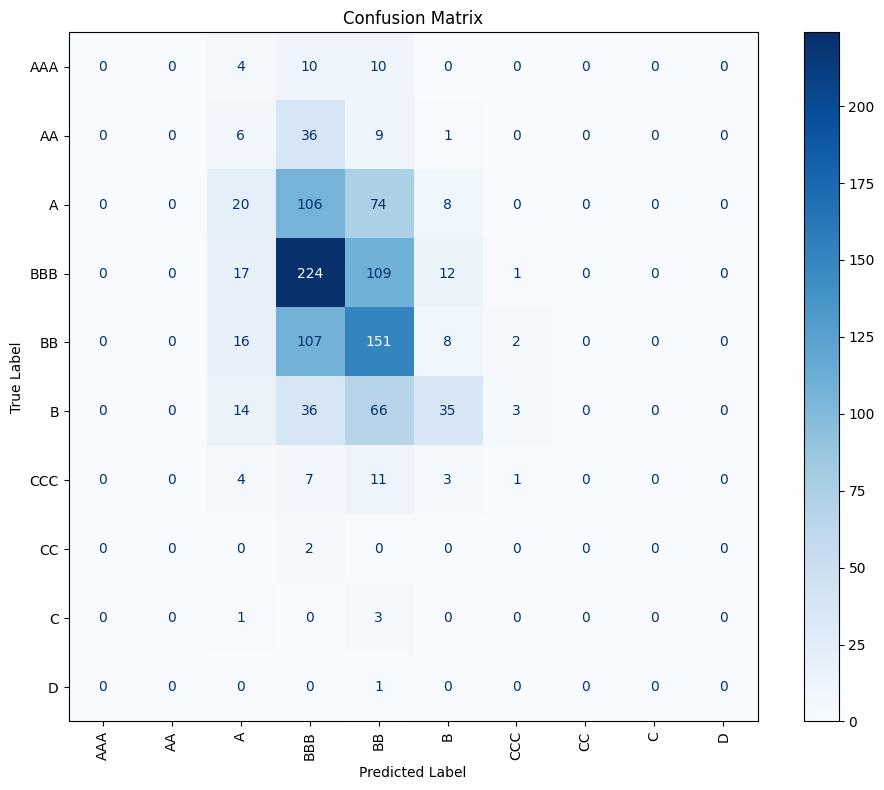

In [6]:
# Evaluate model
evaluate_model(best_model, X_test_scaled, y_test, custom_mapping,model_name)

In [7]:
# Get predictions
get_model_predictions(best_model, X_test_scaled, y_test, custom_mapping, model_name, target_column, df)

X_test_scaled shape
(1118, 1)
y_test shape
(1118,)
accuracy: 0.3855098389982111
share of correct predictions: 0.3855098389982111
assertion that they match:


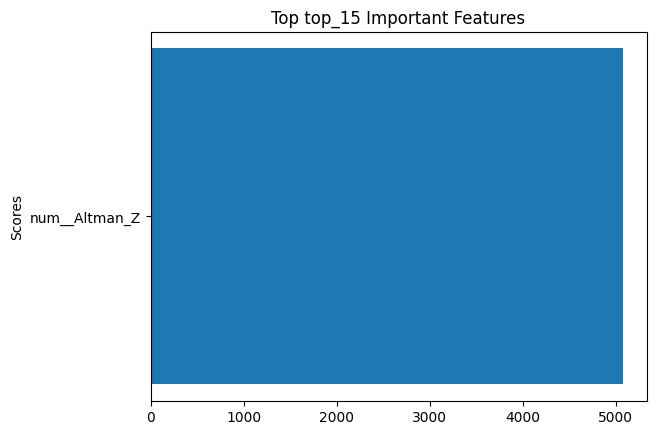

<Figure size 1500x2000 with 0 Axes>

In [8]:
# plot important features
plot_importance(best_model,_,model_name)